# 2019 Stack Overflow Survey Analysis

## Introduction

The Stack Overflow community website is a major resource for programmers worldwide looking for answers to tough questions. As a result, Stack Exchange Inc. has taken to doing a yearly Developer Survey by recruiting users through channels like onsite messages and ads, social media ads and e-mail lists, and they publish the results publically. They call this survey 'the largest and most comprehensive survey of software developers', and this distinction makes the survey a revealing microcosm of the world of working with software. So let's dive in and see what it can teach us.

In [1]:
# Import the necessary libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

## 1. Understanding the Business

I'm very interested in the preferences and subjective experiences of people in the workforce. After some thought, I landed on these three questions to explore in my investigation:

- How does company size influence the job satisfaction of developers?

- Does the age of developers influence which programming languages they know or want to learn?

- Do people in different countries learn about software development in different ways?

## 2. Understanding the Data

For this project, I'm using the **2019 Stack Overflow Annual Developer Survey**, which can be found [here](https://insights.stackoverflow.com/survey). All the survey information is contained in survey_results_public.csv and explored below.

In [2]:
# Import the dataset
df = pd.read_csv('survey_results_public.csv')

df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
# Determine how many rows and columns are in the dataset
df.shape

(88883, 85)

In [4]:
# Get a complete list of columns in the dataset
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

This CSV table contains information collected from nearly 90,000 respondents, and besides the respondent IDs there are 84 columns of data on them. Let's take a look at how much data - and what kind of data - each column contains.

In [5]:
# Take a look at the kind of information in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

There are only 6 columns of numerical data in this dataset. With the exception of 'CompTotal', 'ConvertedComp', 'CodeRevHrs', 'MiscTechWorkedWith' and 'BlockchainOrg', the columns all have more than 60,000 non-null values present.

In [6]:
# Take a look at the numerical data
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


The numbers for total monetary compensation in CompTotal run from 0 to ten quadrillion, so that would be the reason why the ConvertedComp column is used to store the reported compensation values in USD. The yearly earnings in the ConvertedComp column range from nothing to 2,000,000 USD, with the mean compensation being close to 127,000 USD per year. The respondents report working a steady average of 40 hours per week, and spending an average of 5 hours a week on reviewing code. The ages of the respondents range from 1 year (which likely means there are some jokers present) to 99 years (possible, but doubtful) and their mean age is 30.

In [7]:
# Check if there are any duplicate rows in the dataset
df.duplicated().sum()

0

There appear to be no duplicated rows, so that's not something to worry about.

In [8]:
# Examine the software development experience of the respondents
df.MainBranch.value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

The majority of the respondents report being professional software developers, but a good proportion of them are just learning to code. The rest write code as part of other jobs, as a hobby, or no longer work as developers.

In [9]:
# Examine the employment status of the respondents
df.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

More than two-thirds of the respondents claim to have full-time employment.

In [10]:
# Examine the career satisfaction of the respondents
df.CareerSat.value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

There are five possible levels of career satisfaction on the survey, ranging from 'Very dissatisfied' to 'Very satisfied'. The majority of people who answered this question claim to be 'Very satisfied' with their careers, but they only have a slight edge over those who call themselves 'Slightly satisfied'.

In [11]:
# Examine the job satisfaction of the respondents
df.JobSat.value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

When the inquiry shifts from career satisfaction to job satisfaction, though, the results are quite different. More people report being 'Slightly satisfied' than 'Very satisfied' with their jobs, and a larger proportion report being 'Slightly dissatisfied'.

In [12]:
# Examine the company size of the respondents' place of work
df.OrgSize.value_counts()

20 to 99 employees                                    15199
100 to 499 employees                                  12834
10,000 or more employees                              10147
1,000 to 4,999 employees                               7520
2-9 employees                                          7393
10 to 19 employees                                     6768
500 to 999 employees                                   4575
Just me - I am a freelancer, sole proprietor, etc.     4370
5,000 to 9,999 employees                               2985
Name: OrgSize, dtype: int64

Most respondents work in companies that have 20-99 employees, a slightly smaller number work in companies with 100-499 employees, and close to ten thousand respondents report working in a company of 10,000 or more employees.

In [13]:
# Examine the gender of the respondents
df.Gender.value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

The vast majority of the survey respondents identify as male - disappointing, considering the imbalance, but not surprising.

In [14]:
# Examine whether or not the respondents financially support dependents
df.Dependents.value_counts()

No     50727
Yes    32332
Name: Dependents, dtype: int64

The majority of respondents report having no dependents, but a good proportion of them are supporting families.

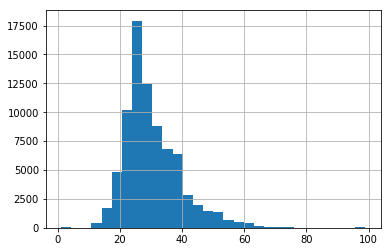

In [15]:
# Examine the relative ages of the respondents
df.Age.hist(bins=30);

Most of the survey respondents fall between the ages of 20 and 40, which backs up the mean age of 30 in the earlier analysis.

In [16]:
df.Age.value_counts()

25.0    4669
24.0    4428
27.0    4418
26.0    4397
28.0    4387
23.0    4109
30.0    4050
29.0    3991
22.0    3358
31.0    3063
32.0    3055
21.0    2736
33.0    2713
34.0    2393
35.0    2388
20.0    2095
36.0    2079
37.0    1807
38.0    1747
19.0    1527
39.0    1406
40.0    1388
18.0    1160
42.0    1024
41.0     976
43.0     835
17.0     704
44.0     699
45.0     694
16.0     588
        ... 
33.5       1
90.0       1
19.5       1
19.9       1
9.0        1
61.3       1
17.3       1
4.0        1
98.9       1
16.9       1
91.0       1
31.4       1
43.5       1
46.5       1
37.5       1
87.0       1
23.9       1
22.5       1
83.0       1
37.3       1
94.0       1
14.1       1
36.8       1
24.8       1
33.6       1
57.9       1
26.3       1
13.5       1
30.8       1
97.0       1
Name: Age, Length: 126, dtype: int64

But wait - some people reported ages with decimal values, instead of whole numbers! That will need to be taken care of when preparing the data for more in-depth analysis.

In [17]:
# Examine the country of origin of respondents
df.Country.value_counts()

United States                            20949
India                                     9061
Germany                                   5866
United Kingdom                            5737
Canada                                    3395
France                                    2391
Brazil                                    1948
Poland                                    1922
Australia                                 1903
Netherlands                               1852
Russian Federation                        1694
Spain                                     1604
Italy                                     1576
Sweden                                    1274
Switzerland                                978
Israel                                     952
Turkey                                     949
Pakistan                                   923
Ukraine                                    868
Austria                                    839
Czech Republic                             764
Romania      

The respondents come from 179 different countries, but the largest number appear to be located in the United States, India, Germany, the United Kingdom, and Canada.

In [18]:
# Find out what kind of social media respondents use most
df.SocialMedia.value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: SocialMedia, dtype: int64

The respondents' most preferred forms of social media are Reddit, YouTube, WhatsApp, and Facebook, with Twitter a little further behind in 5th place.

## 3. Preparing the Data

Most of my work is cut out for me here - I only need nine columns for further analysis, so I can make a new dataframe out of those columns.

In [19]:
# Drop the columns which are not relevant to the data exploration at hand
df = df[['Country', 'EduOther', 'OrgSize', 'JobSat', 'JobFactors', 'WorkChallenge', 
         'LanguageWorkedWith', 'LanguageDesireNextYear', 'Age']]

df.head()

,Country,EduOther,OrgSize,JobSat,JobFactors,WorkChallenge,LanguageWorkedWith,LanguageDesireNextYear,Age
0,United Kingdom,"Taught yourself a new language, framework, or ...",NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,14.0
1,Bosnia and Herzegovina,Taken an online course in programming or softw...,NaN,NaN,Financial performance or funding status of the...,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,19.0
2,Thailand,"Taught yourself a new language, framework, or ...",100 to 499 employees,Slightly satisfied,"Languages, frameworks, and other technologies ...",Distracting work environment;Inadequate access...,HTML/CSS,Elixir;HTML/CSS,28.0
3,United States,Taken an online course in programming or softw...,100 to 499 employees,Slightly satisfied,"Languages, frameworks, and other technologies ...",NaN,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,22.0
4,Ukraine,Taken an online course in programming or softw...,"10,000 or more employees",Slightly dissatisfied,"Industry that I'd be working in;Languages, fra...",Being tasked with non-development work;Inadequ...,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,30.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 9 columns):
Country                   88751 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
JobSat                    70988 non-null object
JobFactors                79371 non-null object
WorkChallenge             68141 non-null object
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
Age                       79210 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.1+ MB


As noted above, some of the numbers in the 'Age' column are currently integers followed by decimals. This could cause a lot of confusion, so we should fix this by rounding the age of each respondent to the nearest whole number.

In [21]:
# Round ages of respondents to the nearest integer
df.Age = df.Age.round()

df.Age.value_counts()

25.0    4670
24.0    4435
27.0    4418
26.0    4400
28.0    4390
23.0    4109
30.0    4051
29.0    3991
22.0    3360
31.0    3065
32.0    3057
21.0    2737
33.0    2713
34.0    2395
35.0    2388
20.0    2097
36.0    2079
37.0    1809
38.0    1750
19.0    1527
39.0    1406
40.0    1388
18.0    1163
42.0    1024
41.0     976
43.0     835
17.0     706
44.0     700
45.0     694
16.0     592
        ... 
99.0      22
73.0      18
1.0       18
75.0      13
11.0      12
74.0      10
76.0       8
78.0       8
2.0        8
77.0       6
10.0       3
79.0       3
5.0        3
98.0       3
3.0        3
81.0       3
84.0       3
82.0       2
88.0       2
80.0       2
95.0       2
94.0       1
4.0        1
87.0       1
83.0       1
9.0        1
91.0       1
85.0       1
97.0       1
90.0       1
Name: Age, Length: 91, dtype: int64

So that appears to be taken care of - now there are only 91 possible age values in the dataset, and all of them are whole numbers followed by a '.0'.

## 4. Modeling and Evaluating the Data

Here, I'm going to take a closer look some of the columns - 'JobFactors', 'WorkChallenge', 'LanguageWorkedWith', 'LanguageDesireNextYear', and 'EduOther'. A little bit of data manipulation is required - for each of these questions, most the respondents ticked multiple answer boxes. There are dozens of combinations of response values, so the strings containing the possible values have to be split and then counted up individually. 

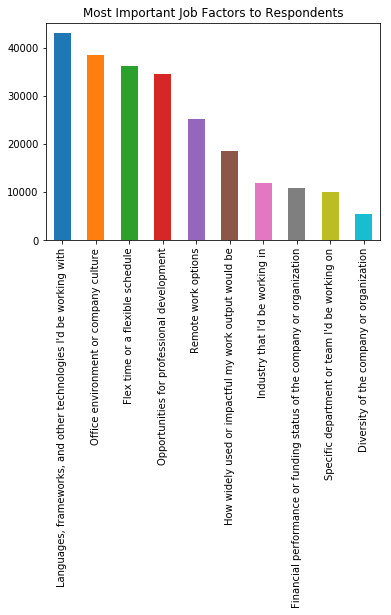

In [22]:
# Find out what job factors are most important to respondents
job_factors = df.JobFactors.str.split(';', expand=True).stack().value_counts()
job_factors.plot(kind='bar')
plt.title('Most Important Job Factors to Respondents');

This graph shows that respondents marked 'Languages, frameworks, and other technologies I'd be working with' as the most important job factor, followed by 'Office environment or company culture', 'Flex time or a flexible schedule' and 'Opportunities for professional development'. That first factor is particularly interesting to me.

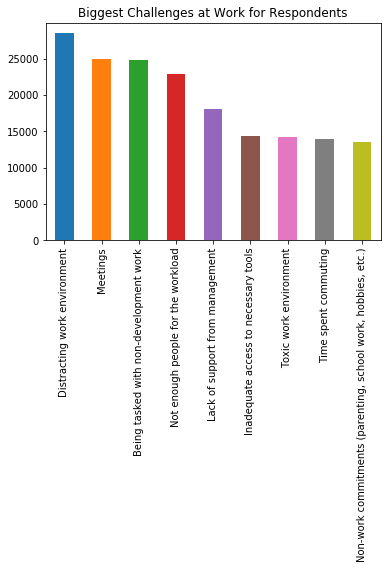

In [23]:
# Find out what challenges at work are most significant to respondents
work_challenges = df.WorkChallenge.str.split(';', expand=True).stack().value_counts()
work_challenges.plot(kind='bar')
plt.title('Biggest Challenges at Work for Respondents');

The biggest challenges for respondents are 'Distracting work environment', 'Meetings', 'Being tasked with non-development work' and 'Not enough people for the workload'. This makes an investigation into the relationship between organization size and respondent satisfaction even more relevant.

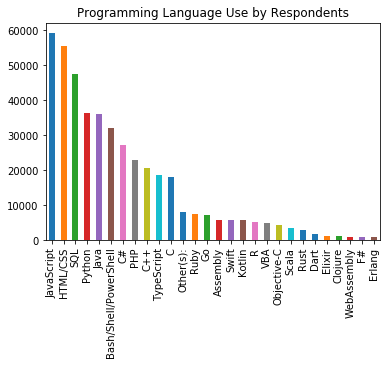

In [24]:
# Find out which programming languages are used most often by respondents
programming_language = df.LanguageWorkedWith.str.split(';', expand=True).stack().value_counts()
programming_language.plot(kind='bar')
plt.title('Programming Language Use by Respondents');

The programming language that respondents report using most often is JavaScript, followed closely by HTML/CSS, then SQL, then Python, Java, and Bash/Shell/PowerShell. There are a lot of different programming languages represented in the dataset, so for simplicity it would probably be best to focus on only the ones between JavaScript and C on the frequency scale. After C, there's a significant dropoff in the frequency counts of the remaining languages.

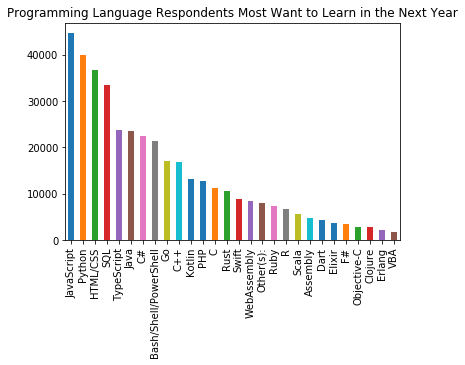

In [25]:
# Find out which programming languages are used most often by respondents
programming_language = df.LanguageDesireNextYear.str.split(';', expand=True).stack().value_counts()
programming_language.plot(kind='bar')
plt.title('Programming Language Respondents Most Want to Learn in the Next Year');

When it comes to which programming languages the respondents would most like to learn, the top 4 are the same, but the order is altered - JavaScript is still number one, but Python jumps ahead of HTML and SQL to become the second most desirable programming language. In this case, it looks like it would be a good idea to focus on the languages from JavaScript to C++ for further analysis.

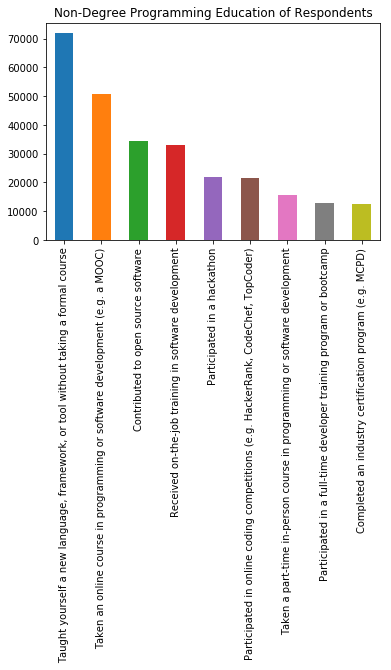

In [26]:
# Find out what kind of informal programming education the respondents have
other_education = df.EduOther.str.split(';', expand=True).stack().value_counts()
other_education.plot(kind='bar')
plt.title('Non-Degree Programming Education of Respondents');

Informal programming education is a particular area of interest to me. It looks like the majority of respondents learned programming by teaching themselves a new language, framework or tool, and the second most-common learning method they report is taking an online course in programming. The third most common method of learning reported is contributing to open-source software, and the fourth is on-the-job training.

Now it's time to answer the questions at hand.

### Question 1: How does company size influence the job satisfaction of developers?

Many respondents claim that 'Office environment or company culture' is an important job factor, and that big challenges at work are 'Distracting work environment', 'Meetings' and 'Not enough people for the workload'. It's not hard to imagine that the size of a company would have an impact on how happy developers are at work.

To find out whether there's a relationship between job satisfaction and company size, I'll use a clustered bar chart, with the clusters on the x-axis denoting organization size and the individual bars in each cluster representing the level of lob satisfaction.

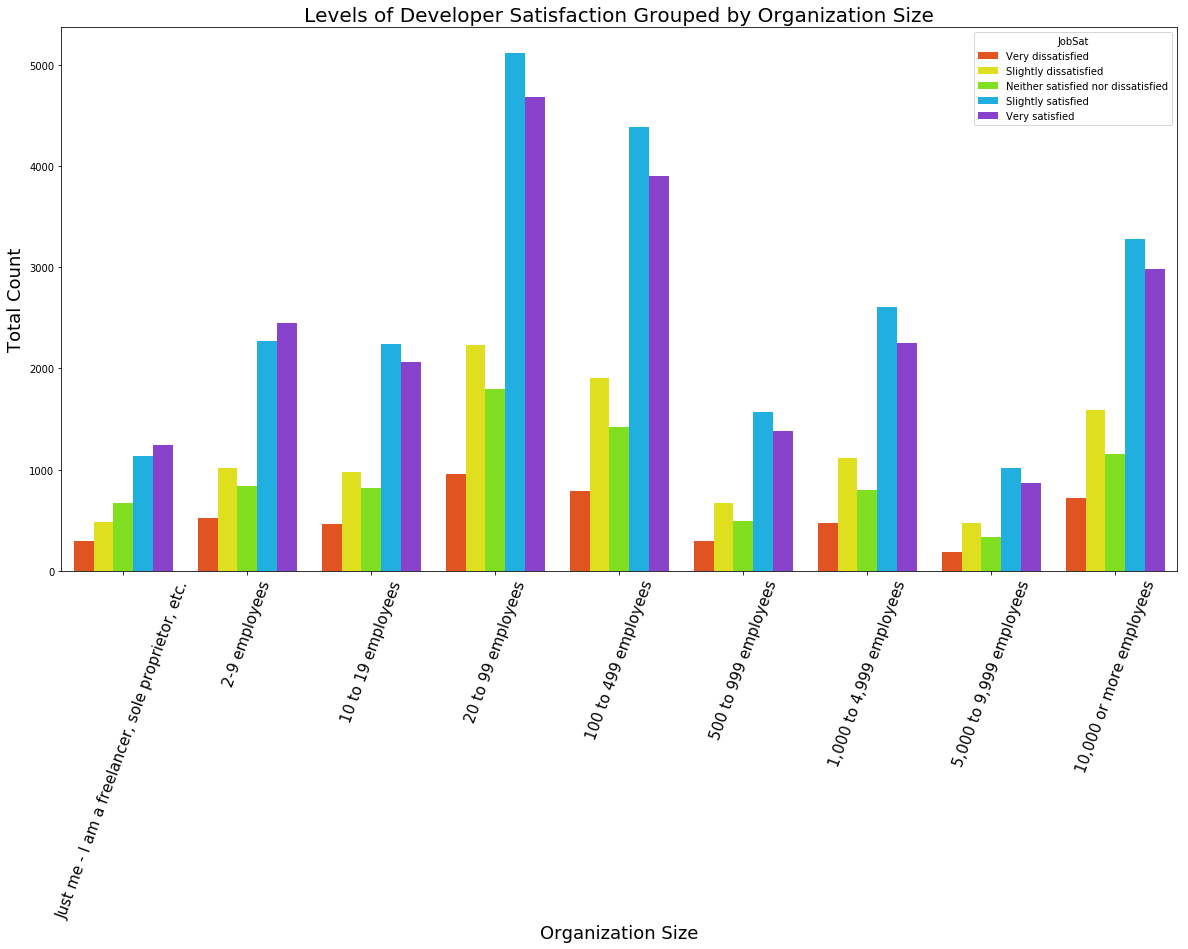

In [27]:
# Make a new dataframe that drops all rows with null values in the OrgSize and JobSat columns
df2 = df.dropna(subset=['OrgSize', 'JobSat'], axis=0)

# Make a clustered bar chart of job satisfaction grouped by organization size
palette={'Very dissatisfied':'orangered', 'Slightly dissatisfied':'yellow',
         'Neither satisfied nor dissatisfied':'chartreuse', 'Slightly satisfied':'deepskyblue',
         'Very satisfied':'blueviolet'}
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x='OrgSize', hue='JobSat', data=df2,
              order=["Just me - I am a freelancer, sole proprietor, etc.", 
                     "2-9 employees", "10 to 19 employees", "20 to 99 employees", 
                     "100 to 499 employees", "500 to 999 employees", 
                     "1,000 to 4,999 employees", "5,000 to 9,999 employees", 
                     "10,000 or more employees"],
              hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'],
              palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=70)
ax.set_title('Levels of Developer Satisfaction Grouped by Organization Size', fontsize=20)
ax.set_xlabel('Organization Size', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18);

Of the range of 9 different organization sizes represented in the survey data, it looks freelancers/sole proprietors and people in companies of 2-9 employees report the highest proportionate job satisfaction - in both these categories, more people report being 'Very satisfied' with their jobs than only 'Slightly satisfied'. Among sole proprietors, more people also report feeling neutral about their jobs than unsatisfied, which distinguishes that category from all other possible categories of organization size.

However, in the two largest categories - respondents in organizations ranging from 20-99 employees, and from 100-499 employees - a larger overall proportion of people report being 'Very satisified' or 'Slightly satisfied' than neutral or dissatisfied.

### Question 2: Does the age of developers influence which programming languages they know or want to learn?

It seems likely that as technology evolves and new people start learning software development, preferences for software tools would shift over time. If such a shift exists, it could potentially be tracked by modeling the popularity of different programming languages among respondents of different ages.

For this analysis, I plan to use a line graph, with the the age of the survey respondents plotted on the x-axis and the lines representing the value counts of each programming language represented. To keep the graph from getting too wide, we'll focus on the respondents between the ages of 18 and 45.

In [28]:
def plot_category_counts(df, numerical_column, categorical_column, 
                         to_drop, title, x_label, y_label):
    ''' Takes a column of sequential numerical data and a column of string values,
    makes a new dataframe out of their information, and returns a line graph 
    of the reshaped data.
    
    Params
    ======
    df (str): the dataframe to be used
    numerical_column (str): the column of numerical data to be used to plot on the x-axis
    categorical_colun (str): the column of categorical data to be plotted on the y-axis
    to_drop (str): the columns to be dropped from the table
    title (str): the title of the line graph
    x_label (str): the label of the x-axis
    y_label (str): the label of the y-axis
    '''
    # Make a list of sequential numerical data columns
    numerical_order = df[numerical_column].unique()
    
    # Make categorical data counts and sequential numerical data into a dictionary, using a loop
    categorical_counts = {}
    for num in numerical_order:
        counts_per_num = df[df[numerical_column].isin([num])]
        counts_per_num = counts_per_num[categorical_column].str.cat(sep=';')
        counts_per_num = pd.Series(counts_per_num.split(';'))
        counts_per_num = counts_per_num.value_counts()
        categorical_counts[num] = counts_per_num

    # Create a new dataframe using the dictionary, with numbers as columns and categories as rows
    df_cat_counts = pd.DataFrame()
    for k, v in categorical_counts.items():
        df_cat_counts[k] = v

    # Switch category counts and numbers using the'transpose' method, and sort the values to match
    df_cat_counts = df_cat_counts.transpose()
    df_cat_counts = df_cat_counts.sort_index()

    # Drop the less prevalent/relevant columns of data
    df_cat_counts.drop(to_drop, axis=1, inplace=True)
    # Bound respondents between the ages of 18 and 45
    df_cat_counts = df_cat_counts.iloc[15:43]

    # Plot the resulting information in a line graph
    ax = df_cat_counts.plot(figsize=(20,10), kind='line', colormap='gist_rainbow')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18);

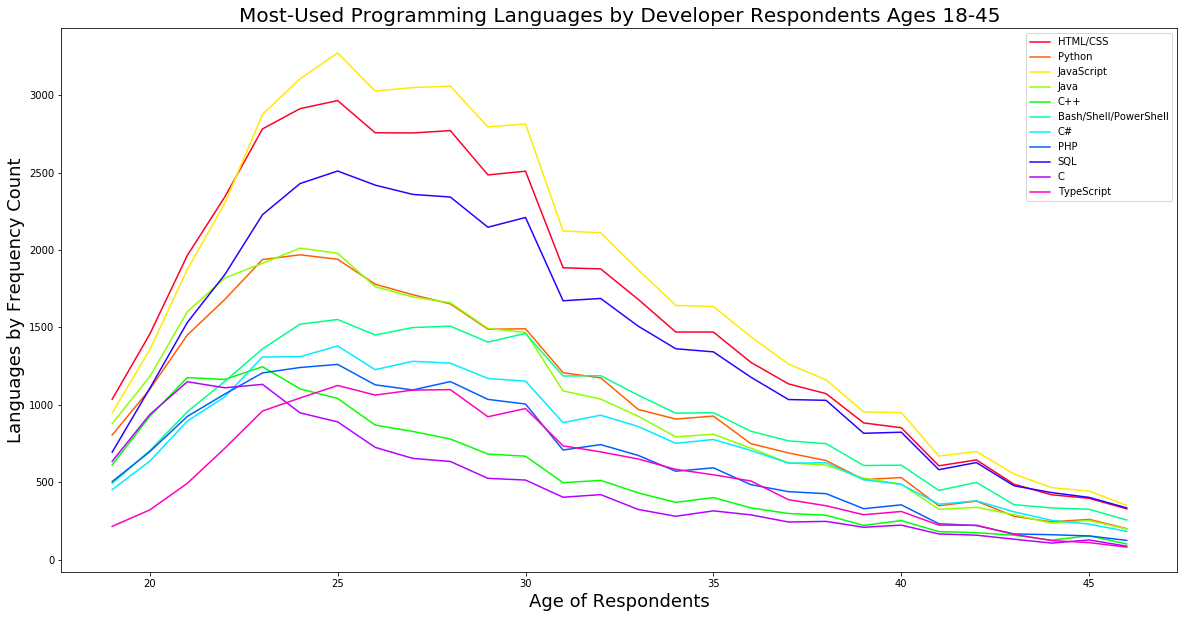

In [29]:
# Use the new function on the 'Age' and 'LanguageWorkedWith' columns
to_drop = ['Other(s):', 'Ruby', 'Go', 'Assembly', 'Swift', 'Kotlin', 'R', 
           'VBA', 'Objective-C', 'Scala', 'Rust', 'Dart', 'Elixir', 'Clojure', 
           'WebAssembly', 'F#']
plot_category_counts(df, 'Age', 'LanguageWorkedWith', to_drop,
                     'Most-Used Programming Languages by Developer Respondents Ages 18-45',
                     'Age of Respondents',
                     'Languages by Frequency Count')

This graph shows that **Bash/Shell/PowerShell** is the 4th most common programming language among the older respondents, but it starts to drop off pretty significantly in popularity among the younger ones, and is surpassed by **Java** and **Python** among the under-30s. **Java** and **Python** are both used more often the younger the respondents are, and the ones 20 and younger use those languages even more than **SQL**. The respondents younger than 22 also report using **JavaScript** more than **HTML**, which is a major change from the older generations of programmers. And there's a notable increase in the use of **C** and **C++** among the under-25s.

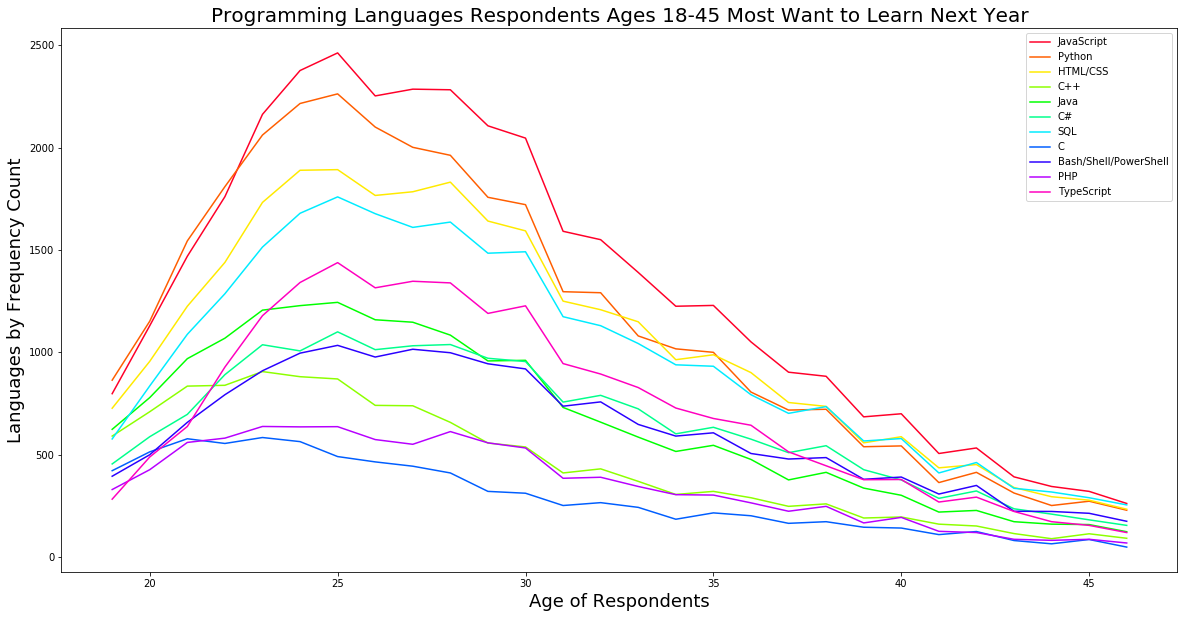

In [30]:
# Use the function on the 'Age' and 'LanguageDesireNextYear' columns
to_drop = ['Other(s):', 'Ruby', 'Go', 'Assembly', 'Swift', 'Kotlin', 'R', 
           'VBA', 'Objective-C', 'Scala', 'Rust', 'Dart', 'Elixir',
           'Clojure', 'WebAssembly', 'F#', 'Erlang']
plot_category_counts(df, 'Age', 'LanguageDesireNextYear', to_drop,
                     'Programming Languages Respondents Ages 18-45 Most Want to Learn Next Year',
                     'Age of Respondents',
                     'Languages by Frequency Count')

In this graph, we can see that **Python** becomes a more desireable programming language the younger the respondents are - it goes from being roughly tied with **SQL** and **HTML** to being almost as desired as **JavaScript** by 25-year-olds. The desirability of **Python** overtakes **JavaScript** among respondents age 22 and younger. And the increase in the use of **C** and **C++** among younger respondents is also reflected in their gradual increase in desirability, along with an even bigger increase in respondent interest in **Java**. On the other hand, **TypeScript** goes from being the 5th most-desired programming language for respondents aged 24-to-36 to being the least desired for the 18-year-olds.

### Question 3: Do people in different countries learn about software development in different ways?

Cultural differences can have a significant impact on self-directed learning. It seems likely that people who live and work in different countries would use different channels to learn software development skills.

For this analysis, I'll select the ten countries that the largest number of respondents report being from. Then I'll use correlation matrix to make a heat map of those countries and the value counts of the various types of non-degree software development education that their residents have taken advantage of.

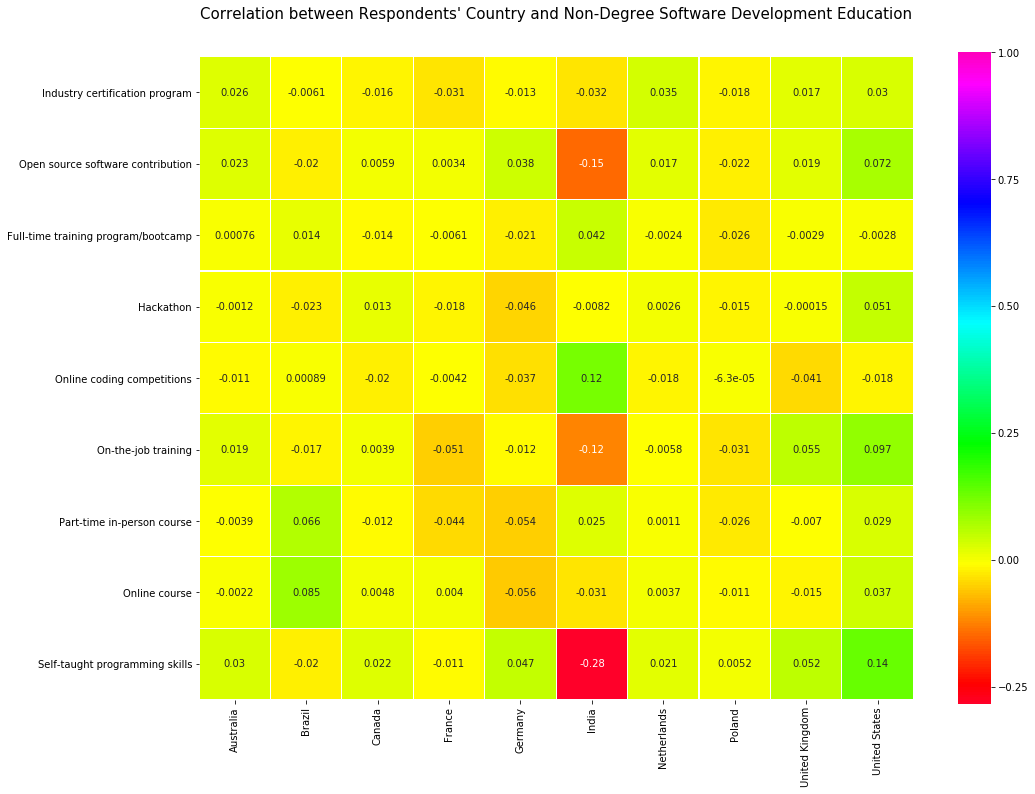

In [31]:
# Make a new dataframe with only the Country and EduOther columns,
# using only the top 10 countries among respondents
df3_columns = ['Country', 'EduOther'] 
df3 = pd.DataFrame(df.query("Country == 'United States' or Country == 'India' or Country == 'Germany' or Country == 'United Kingdom' or Country == 'Canada' or Country == 'France' or Country == 'Brazil' or Country == 'Poland' or Country == 'Australia' or Country == 'Netherlands'"))[df3_columns]

# Split the Country and EduOther values into columns of dummy variables
df3 = pd.concat([df3.drop('Country', axis=1), df3['Country'].str.get_dummies()], axis=1)
df3 = pd.concat([df3.drop('EduOther', axis=1), df3['EduOther'].str.get_dummies(sep=';')], axis=1)

# Make a correlation matrix, and then use the correlation matrix as a new dataframe
df3 = df3.corr()

# Drop the Country rows from one axis, and the EduOther columns from the other
df3.drop(['Australia', 'Brazil', 'Canada', 'France', 'Germany', 'India',
          'Netherlands', 'Poland', 'United Kingdom', 'United States'], axis=0, inplace=True)
df3.drop(['Completed an industry certification program (e.g. MCPD)',
          'Contributed to open source software',
          'Participated in a full-time developer training program or bootcamp',
          'Participated in a hackathon',
          'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)',
          'Received on-the-job training in software development',
          'Taken a part-time in-person course in programming or software development',
          'Taken an online course in programming or software development (e.g. a MOOC)',
          'Taught yourself a new language, framework, or tool without taking a formal course'], 
         axis=1, inplace=True)
# Rename the EduOther rows to conserve space on the graph
df3.rename(index={'Completed an industry certification program (e.g. MCPD)': 'Industry certification program',
                  'Contributed to open source software': 'Open source software contribution',
                  'Participated in a full-time developer training program or bootcamp': 'Full-time training program/bootcamp',
                  'Participated in a hackathon': 'Hackathon',
                  'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Online coding competitions',
                  'Received on-the-job training in software development': 'On-the-job training',
                  'Taken a part-time in-person course in programming or software development': 'Part-time in-person course',
                  'Taken an online course in programming or software development (e.g. a MOOC)': 'Online course',
                  'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught programming skills'},
           inplace=True)

# Plot the results on a heatmap
colormap = plt.cm.gist_rainbow
plt.figure(figsize=(16, 12))
plt.title("Correlation between Respondents' Country and Non-Degree Software Development Education", y=1.05, size=15)
sns.heatmap(df3, linewidths=0.1, vmax=1, square=True, cmap=colormap, linecolor='white', annot=True);

There are some interesting trends indicated here. To start, the correlations clearly show that survey respondents from **India** are least likely to teach themselves programming skills, to contribute to open-source software, or to receive on-the-job training - but they have a strong inclination to participate in online coding competitions, and are relatively likely to participate in full-time training programs. By contrast, respondents from the **United States** are very likely to have self-taught programming skills, on-the-job training or open-source software contributions, and are relatively likely to participate in hackathons. 

The ones most likely to learn software development from online programming courses or MOOCs are respondents from from **Brazil**, and they are also the most likely to take part-time in-person courses. **United Kingdom** respondents have a positive correlation with on-the-job training and self-taught skills, and a negative one with online coding competitions. Respondents from **France** are relatively unlikely to learn programming from on-the-job training or part-time in-person courses. And respondents from **Germany** are unlikely to learn from online courses, part-time in-person courses, hackathons or coding competitions, and are likely to to be self-taught or contribute to open source-software instead.